ML-Project

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving laptop.csv to laptop (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as pty
import sklearn as sk
import re

In [ ]:
# loading the dataset
df = pd.read_csv("laptop.csv")

In [ ]:
# making copy of the data
copy_df = df.copy()

# Rough plannning points
* delete or remove temporalry the **unnmaed:0.1** and **unnmaned:0 column**
* **ScreenResolution** : need to change & divide screen resolution, divide **type** and **size**, IPS, TouchScreen
* **Cpu** : divide **brand**, **brand type**, **generation & series**, **freqeuncy**
* **memory** : seperate **size** and **memory type** and also 2 memory column
* **Gpu** : **brand**, **category**
* **OpSys** : seperate OS brand and OS version
* **RAM** : needs to convert to numerical column
* **Weight** : need convert to numerical column

# **Data Exploration and Understanding:**

In [ ]:
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [ ]:
# checking null values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [ ]:
# dropping this column as they were not required for analysis
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"], axis=1,inplace=True)

In [ ]:
# Checking null rows
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# count of null rows
rows_null = df.isnull().any(axis=1)
count_null_rows = rows_null.sum()
print("Count of rows where any column is null:", count_null_rows)

Count of rows where any column is null: 30


In [ ]:
# It seems that there are null values or missing entries with no data in that rows
# so i am removing that rows
# As every column data of this rows are null i am using dropna function
df = df.dropna()

In [ ]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
18,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 7100U 2.4GHz,8GB,1TB HDD,Nvidia GeForce 940MX,No OS,2.2kg,26586.72
291,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3kg,63243.36
35,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4GB,64GB Flash Storage,Intel HD Graphics 500,Windows 10,1.44kg,13266.72
229,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD FirePro W4190M,Windows 10,1.9kg,67612.32
40,Asus,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Intel HD Graphics 620,Linux,2kg,20725.92


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 119.3+ KB


## Exploring each column for some few details about them

# **Price Distribution**

<Axes: xlabel='Price', ylabel='Density'>

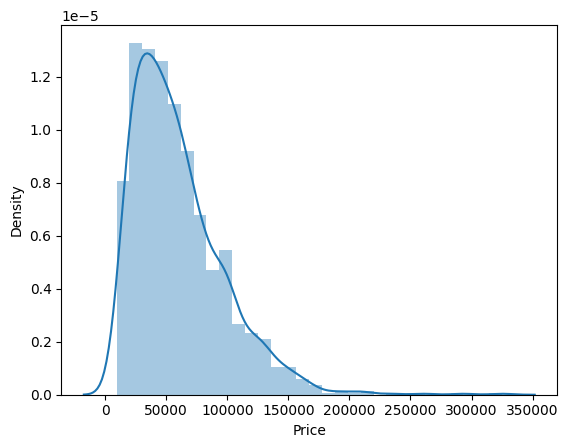

In [ ]:
sns.distplot(df['Price'], bins=30, kde=True)

# **Company insights**

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
Total companies : 19


<Axes: xlabel='Company'>

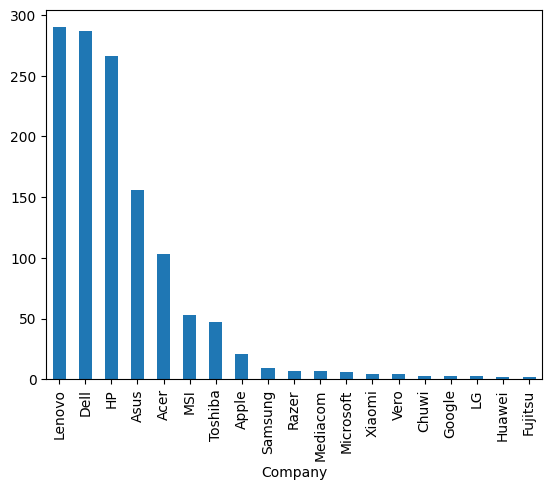

In [ ]:
unique_company = df["Company"].unique()   # identifying companies present in data
print(unique_company)
total_companies = len(unique_company)    # it give count of the companies
print(f"Total companies : {total_companies}")
# company with number of specification in market
df['Company'].value_counts().plot(kind='bar')

# Conclusion of Company insights :      
* There **total 19 companies** in our dataset
* **Lenovo have highest** number of feature and specification in market of **290**
* **Huawei and Fujitsu have lowest** number of feature and specification in market of **2**

# **TypeName Insights**

In [ ]:
unique_typename = df["TypeName"].unique()   # identifying typename present in data
print(unique_typename)
total_typename = len(unique_typename)    # it give count of the typename
print(f"Total TypeName : {total_typename}")
# Number of typename present in market
typename_value_counts = df["TypeName"].value_counts()
typename_value_counts

['Ultrabook' 'Notebook' 'Gaming' '2 in 1 Convertible' 'Workstation'
 'Netbook']
Total TypeName : 6


TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

# Conclusion of TypeName insights :      
* There **total 6 TypeName** in our dataset
* **Notebook have highest** number of presence in market of **710**
* **Netbook have lowest** number of fpresence in market of **24**

# **Inches insights**

In [ ]:
 # identifying Laptop Inches present in data
unique_inches = df["Inches"].unique()
print(unique_inches)
# finding count of the inches
total_inches = len(unique_inches)
print(f"Total Types of Laptop Inches : {total_inches}")

['13.3' '15.6' '15.4' '14' '12' '17.3' '13.5' '12.5' '13' '18.4' '13.9'
 '11.6' '25.6' '35.6' '12.3' '27.3' '24' '33.5' '?' '31.6' '17' '15'
 '14.1' '11.3' '10.1']
Total Types of Laptop Inches : 25


# ScreenResolution :

In [ ]:
 # identifying Laptop ScreenResolution present in data
unique_ScreenResolution = df["ScreenResolution"].unique()
print(unique_ScreenResolution)
# finding count of the ScreenResolution
total_ScreenResolution = len(unique_ScreenResolution)
print(f"Total Types of Laptop ScreenResolution : {total_ScreenResolution}")

['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 1920x1080' 'Touchscreen / Quad HD+ 3200x1800'
 'Touchscreen 2256x1504' 'Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel 1366x768' 'IPS Panel 4K Ultra HD / Touchscreen 3840x2160'
 'IPS Panel Full HD 2160x1440' '4K Ultra HD / Touchscreen 3840x2160'
 '1600x900' 'IPS Panel 4K Ultra HD 3840x2160' '4K Ultra HD 3840x2160'
 'Touchscreen 1366x768' 'Touchscreen 2560x1440'
 'IPS Panel Full HD 1366x768' 'IPS Panel 2560x1440'
 'IPS Panel Full HD 2560x1440' 'IPS Panel Retina Display 2736x1824'
 'Touchscreen 2400x1600' '2560x1440' 'IPS Panel Quad HD+ 2560x1440'
 'IPS Panel Quad HD+ 3200x1800'
 'IPS Panel Quad HD+ / Touchscreen 3200x1800'
 'IPS Panel Touchscreen 1366x768' '1920x1080'
 'IPS Panel Full HD 1920x1200'
 'IPS Panel Touchscreen / 4K Ultra HD 3

# ScreeenResolution Conclusion :
* 1366x768  =  HD
* 1440x900  =  HD+
* 1600x900  =  HD+    
* 1920x1080  =  Full HD
* 1920x1200  =  Full HD
* 2160x1440  =  Full HD
* 2256x1504  =  
* 2304x1440  =  Retina Display
* 2400x1600  =    
* 2560x1440  =  Quad HD
* 2560x1600  =  Retina Display
* 2736x1824  =  Retina Display
* 2880x1800  =  Retina Display
* 3200x1800  =  Qaud HD+
* 3840x2160  =  4K Ultra HD

# **CPU insights**


In [ ]:
 # identifying CPU present in data
unique_Cpu = df["Cpu"].unique()
print(unique_Cpu)
# finding count of the CPU
total_Cpu = len(unique_Cpu)
print(f"Total variants of Cpu : {total_Cpu}")

['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Core i5 7300HQ 2.5GHz' 'AMD E-Series E2-9000e 1.5GHz'
 'Intel Core i5 1.6GHz' 'Intel Core i7 8650U 1.9GHz'
 'Intel Atom x5-Z8300 1.44GHz' 'AMD E-Series E2-6110 1.5GHz'
 'AMD A6-Series 9220 2.5GHz' 'Intel Celeron Dual Core N3350 1.1GHz'
 'Intel Core i3 7130U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 2.0GHz' 'AMD Ryzen 1700 3GHz'
 'Intel Pentium Quad Core N4200 1.1GHz'
 'Intel Celeron Dual Core N3060 1.6GHz' 'Intel Core i5 1.3GHz'
 'AMD FX 9830P 3GHz' 'Intel Core i7 7560U 2.4GHz'
 'AMD E-Series 6110 1.5GHz' 'Intel Core i5 6200U 2.3GHz'
 'Intel Core M 6Y75 1.2GHz' 'Intel Core i5 7500U 

# CPU insights
I extrarct cpu series in our dataset
* Core M Core i3 ,Core i5, Core i7
* E-Series, A4-Series, A6-Series, A8-Series, A9-Series, A10-Series, A12-Series
* Ryzen
* Atom
* Xeon
* FX
* Celeron Quad Core, Celeron Dual Core
* Pentium Dual Core,Pentium Quad Core
* Cortex A72&A53

# **RAM Insights**

In [ ]:
 # identifying RAM present in data
unique_Ram = df["Ram"].unique()
print(unique_Ram)
# finding count of the RAM
total_Ram = len(unique_Ram)
print(f"Total Types of Ram : {total_Ram}")

['8GB' '16GB' '4GB' '2GB' '12GB' '64GB' '6GB' '32GB' '24GB' '1GB']
Total Types of Ram : 10


# **Memory Insights**

In [ ]:
 # identifying Memory present in data
unique_memory = df["Memory"].unique()
print(unique_memory)
# finding count of the Memory
total_memory = len(unique_memory)
print(f"Total variants in Memory : {total_memory}")

['128GB SSD' '128GB Flash Storage' '256GB SSD' '512GB SSD' '500GB HDD'
 '256GB Flash Storage' '1TB HDD' '128GB SSD +  1TB HDD'
 '256GB SSD +  256GB SSD' '64GB Flash Storage' '32GB Flash Storage'
 '256GB SSD +  1TB HDD' '256GB SSD +  2TB HDD' '32GB SSD' '2TB HDD'
 '64GB SSD' '1.0TB Hybrid' '512GB SSD +  1TB HDD' '1TB SSD'
 '256GB SSD +  500GB HDD' '128GB SSD +  2TB HDD' '512GB SSD +  512GB SSD'
 '16GB SSD' '16GB Flash Storage' '512GB SSD +  256GB SSD'
 '512GB SSD +  2TB HDD' '64GB Flash Storage +  1TB HDD' '180GB SSD'
 '1TB HDD +  1TB HDD' '32GB HDD' '1TB SSD +  1TB HDD' '?'
 '512GB Flash Storage' '128GB HDD' '240GB SSD' '8GB SSD' '508GB Hybrid'
 '1.0TB HDD' '512GB SSD +  1.0TB Hybrid' '256GB SSD +  1.0TB Hybrid']
Total variants in Memory : 40


# **GPU insights**

In [ ]:
 # identifying GPU present in data
unique_gpu = df["Gpu"].unique()
print(unique_gpu)
# finding count of the GPU
total_gpu = len(unique_gpu)
print(f"Total variants in GPU : {total_gpu}")

['Intel Iris Plus Graphics 640' 'Intel HD Graphics 6000'
 'Intel HD Graphics 620' 'AMD Radeon Pro 455'
 'Intel Iris Plus Graphics 650' 'AMD Radeon R5' 'Intel Iris Pro Graphics'
 'Nvidia GeForce MX150' 'Intel UHD Graphics 620' 'Intel HD Graphics 520'
 'AMD Radeon Pro 555' 'AMD Radeon R5 M430' 'Intel HD Graphics 615'
 'AMD Radeon Pro 560' 'Nvidia GeForce 940MX' 'Nvidia GeForce GTX 1050'
 'AMD Radeon R2' 'AMD Radeon 530' 'Nvidia GeForce 930MX'
 'Intel HD Graphics' 'Intel HD Graphics 500' 'Nvidia GeForce 930MX '
 'Nvidia GeForce GTX 1060' 'Nvidia GeForce 150MX'
 'Intel Iris Graphics 540' 'AMD Radeon RX 580' 'Nvidia GeForce 920MX'
 'AMD Radeon R4 Graphics' 'AMD Radeon 520' 'Nvidia GeForce GTX 1070'
 'Nvidia GeForce GTX 1050 Ti' 'Intel HD Graphics 400'
 'Nvidia GeForce MX130' 'AMD R4 Graphics' 'Nvidia GeForce GTX 940MX'
 'AMD Radeon RX 560' 'Nvidia GeForce 920M' 'AMD Radeon R7 M445'
 'AMD Radeon RX 550' 'Nvidia GeForce GTX 1050M' 'Intel HD Graphics 515'
 'AMD Radeon R5 M420' 'Intel HD Graphi

# **OpSys insights**

In [ ]:
 # identifying operating System present in data
unique_OpSys = df["OpSys"].unique()
# print(unique_OpSys)
# finding count of the operating System
total_OpSys = len(unique_OpSys)
print(f"Total variants in OpSys : {total_OpSys}")
# Number of OpSys present in market
OpSys_value_counts = df["OpSys"].value_counts()
OpSys_value_counts

Total variants in OpSys : 9


OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

# Conclusion of Operating System insights :      
* There **total 9 OpSys** in our dataset
* **Windows 10 have highest** number of presence in market of **1047**
* **Android have lowest** number of presence in market of **1**

# **Weight Insights**

In [ ]:
 # identifying Weight present in data
unique_weight = df["Weight"].unique()
print(unique_weight)
# finding count of the Weight
total_weight = len(unique_weight)
print(f"Total variants in Weight : {total_weight}")

['1.37kg' '1.34kg' '1.86kg' '1.83kg' '2.1kg' '2.04kg' '1.3kg' '1.6kg'
 '2.2kg' '0.92kg' '1.22kg' '2.5kg' '1.62kg' '1.91kg' '2.3kg' '1.35kg'
 '1.88kg' '1.89kg' '1.65kg' '2.71kg' '1.2kg' '1.44kg' '2.8kg' '2kg'
 '2.65kg' '2.77kg' '3.2kg' '1.49kg' '2.4kg' '2.13kg' '2.43kg' '1.7kg'
 '1.4kg' '1.8kg' '1.9kg' '3kg' '1.252kg' '2.7kg' '2.02kg' '1.63kg'
 '1.96kg' '1.21kg' '2.45kg' '1.25kg' '1.5kg' '2.62kg' '1.38kg' '1.58kg'
 '1.85kg' '1.23kg' '2.16kg' '2.36kg' '7.2kg' '2.05kg' '1.32kg' '1.75kg'
 '0.97kg' '2.56kg' '1.48kg' '1.74kg' '1.1kg' '1.56kg' '2.03kg' '1.05kg'
 '5.4kg' '4.4kg' '1.90kg' '1.29kg' '2.0kg' '1.95kg' '2.06kg' '1.12kg'
 '3.49kg' '3.35kg' '2.23kg' '?' '2.9kg' '4.42kg' '2.69kg' '2.37kg' '4.7kg'
 '3.6kg' '2.08kg' '4.3kg' '1.68kg' '1.41kg' '4.14kg' '2.18kg' '2.24kg'
 '2.67kg' '4.1kg' '2.14kg' '1.36kg' '2.25kg' '2.15kg' '2.19kg' '2.54kg'
 '3.42kg' '5.8kg' '1.28kg' '2.33kg' '1.45kg' '2.79kg' '8.23kg' '1.26kg'
 '1.84kg' '0.0002kg' '2.6kg' '2.26kg' '3.25kg' '1.59kg' '1.13kg' '1.42kg'
 '1.7

# **Trends in Laptop Prices relation with Company, laptop Typ, operating system**

In [ ]:
import warnings

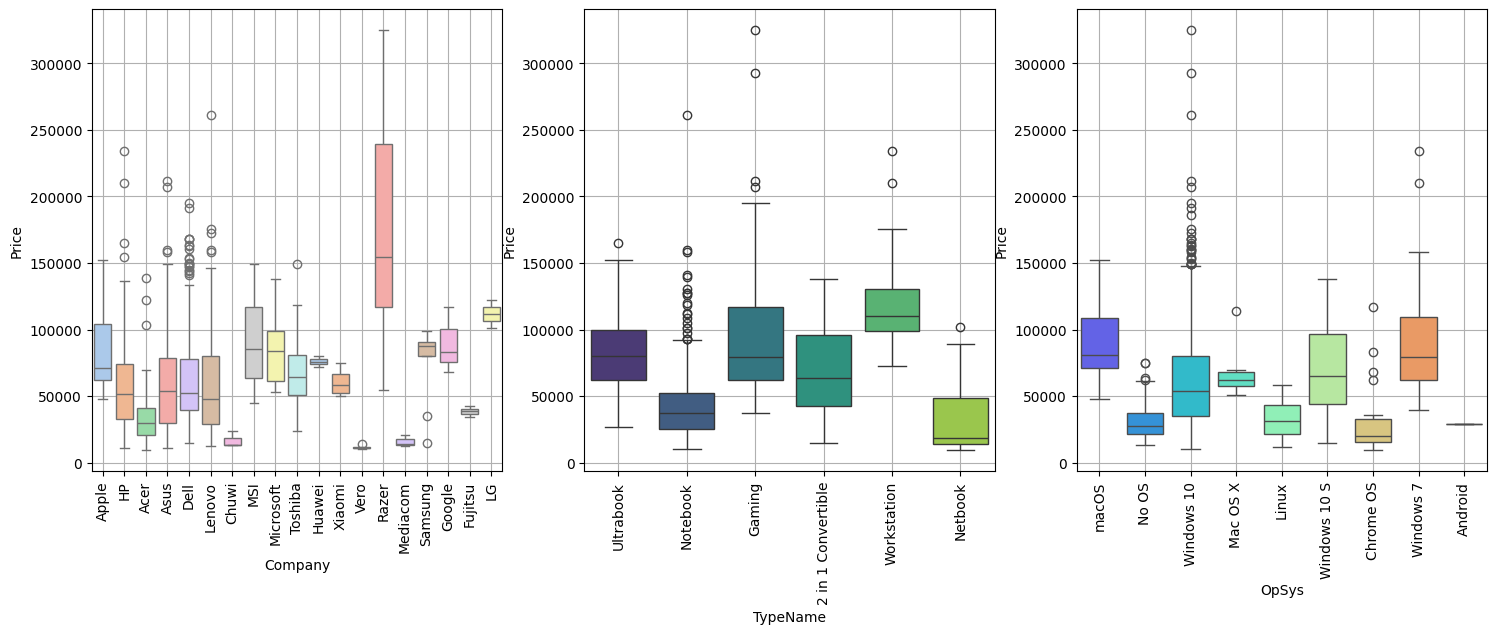

In [ ]:
# avg_company_price = df.groupby('Company')['Price'].mean()
# avg_type_price = df.groupby('TypeName')['Price'].mean()
# avg_opsys_price = df.groupby('OpSys')['Price'].mean()

warnings.filterwarnings("ignore")
plt.figure(figsize=(18,6))

# Box plot of Company and Price
plt.subplot(1,3,1)
sns.boxplot(x=df["Company"], y=df["Price"], palette="pastel")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid(True)

# Box plot of typeName and Price
plt.subplot(1,3,2)
sns.boxplot(x=df["TypeName"], y=df["Price"],palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid(True)

# Box plot of OpSys and Price
plt.subplot(1,3,3)
sns.boxplot(x=df["OpSys"], y=df["Price"],palette="rainbow")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.grid(True)
plt.show()


# Visualizing the relationship between numerical features and laptop prices using scatter plots

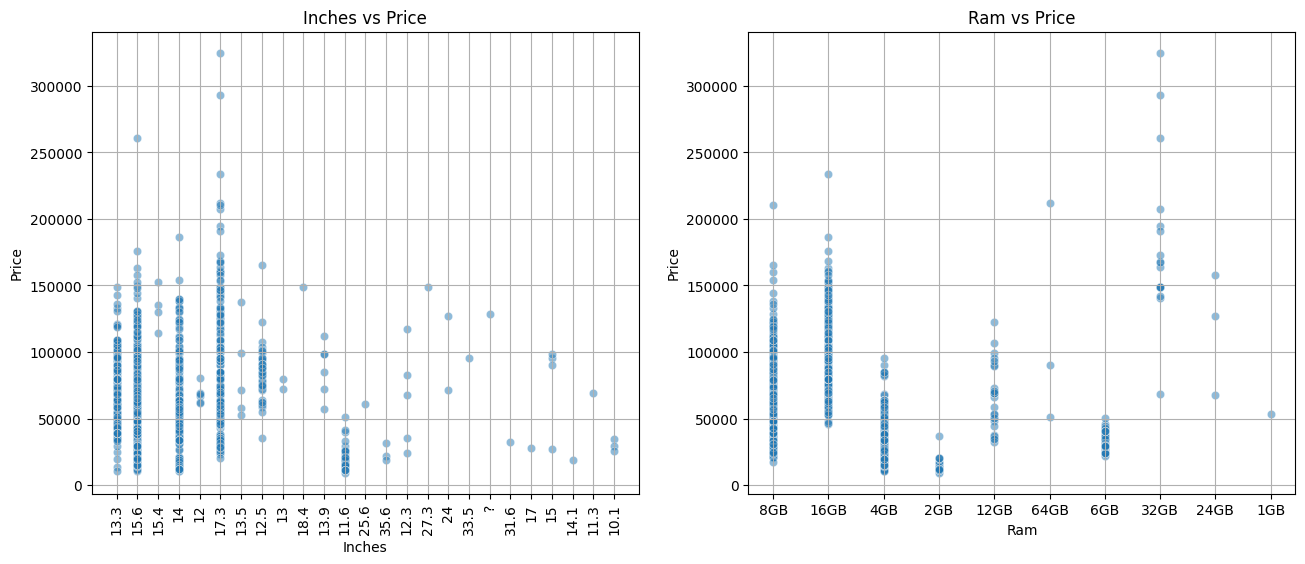

In [ ]:
plt.figure(figsize=(24,6))

# Scatter plot between Inches and Price
plt.subplot(1,3,1)
sns.scatterplot(x=df["Inches"], y=df["Price"], data=df, alpha=0.5)
plt.xticks(rotation=90)
plt.title("Inches vs Price")
plt.xlabel("Inches")
plt.ylabel("Price")
plt.grid(True)

# Scatter plot between Ram and Price
plt.subplot(1,3,2)
sns.scatterplot(x=df["Ram"], y=df["Price"], data=df, alpha=0.5)
plt.title("Ram vs Price")
plt.xlabel("Ram")
plt.ylabel("Price")
plt.grid(True)


To gain the insights about the ScreenResolution, CPU, Memory and GPU column we need to clean that columns and bring more organized cateory for them


# **Data Preprocessing**

# We are Creating New dataframe named as new_df from here to have clarity in preprocessing work

In [ ]:
# after data exploration and some basic data cleaning we are creating this new new_df
new_df = df.copy()

In [ ]:
new_df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
# checking missing values
new_df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Handling outliers

* **Numerical Columns:** Inches, weight, Price
* **Target column:** Price

* ### Converting Inches into numerical column
* ### Converting Weight into numerical column by removing 'kg' from theh column and changing to numerical column

In [ ]:
# Preprocessiiing the 'inches' column
# First, replace non-numeric values with NaN
new_df['Inches'] = pd.to_numeric(new_df['Inches'], errors='coerce')


In [ ]:
# Replacing Null values in the 'Inches' column with the mean value
new_df['Inches'].fillna(new_df['Inches'].mean(), inplace=True)

# Converting the 'Inches' column to numeric datatype
new_df['Inches'] = pd.to_numeric(new_df['Inches'])

In [ ]:
# Removing 'Kg' from Weight column as and renaming weight column as Weight -> Weight(in Kg) and converting to numerical column

# Replace '?' with NaN
new_df['Weight'] = new_df['Weight'].replace('?', np.nan)
new_df['Weight_kg'] = new_df['Weight'].str.replace('Kg', '').str.replace('kg', '').astype(float)

# Replacing Null values in the 'Inches' column with the mean value (for if any null introduced due to above step)
new_df['Weight_kg'].fillna(new_df['Weight_kg'].mean(), inplace=True)



In [ ]:
# Dropping the original Weight column
new_df.drop(columns=['Weight'], inplace=True)


In [ ]:
new_df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_kg
787,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,4GB,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,53226.7200,2.40
583,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,16GB,256GB SSD,Nvidia GeForce 930MX,Windows 10,81912.1392,1.93
1216,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,31861.4400,3.30
298,Lenovo,Notebook,15.6,Full HD 1920x1080,AMD A10-Series 9600P 2.4GHz,6GB,1TB HDD,AMD Radeon R5 430,Windows 10,26586.7200,2.40
1269,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,38378.6496,2.20


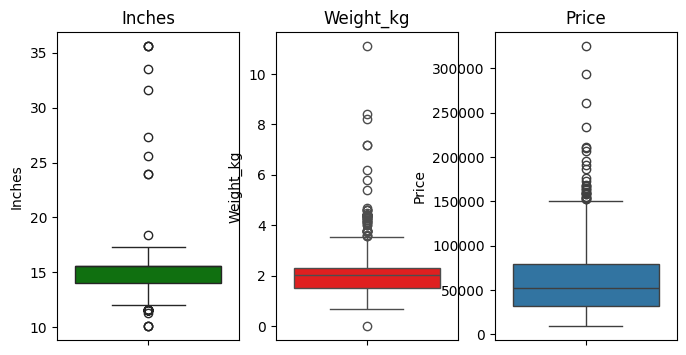

In [ ]:
plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
sns.boxplot(y=new_df["Inches"], color="g")
plt.title("Inches")
plt.ylabel("Inches")

plt.subplot(1,3,2)
sns.boxplot(y=new_df["Weight_kg"], color="r")
plt.title("Weight_kg")
plt.ylabel("Weight_kg")

plt.subplot(1,3,3)
sns.boxplot(y=new_df["Price"])
plt.title("Price")
plt.ylabel("Price")

plt.show()

## Handling outlier in Inches column


In [ ]:
# Outlier detecting
q1 = new_df['Inches'].quantile(0.25)
q3 = new_df['Inches'].quantile(0.75)
print(f"q1 = {q1} and q3 = {q3}")
# Calculating the interquartile range (IQR)
IQR = q3 - q1
print(f"IQR = {IQR}")
# Define the outlier step
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR
print(f"UL = {UL} and LL = {LL}")

q1 = 14.0 and q3 = 15.6
IQR = 1.5999999999999996
UL = 18.0 and LL = 11.600000000000001


In [ ]:
# filtering to check all the rows with outliers
# outlier rows
outlier_rows = new_df[(new_df["Inches"]>UL) | (new_df["Inches"] <LL)]
print("Number of outlier rows = ",outlier_rows.shape[0])
outlier_rows.sample(n=5)

Number of outlier rows =  45


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_kg
1049,Asus,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,15339.312,1.20
959,Acer,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,20725.920,1.25
408,Lenovo,Notebook,35.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,500GB HDD,Intel HD Graphics 520,Windows 10,21791.520,2.20
695,Acer,Netbook,11.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics,Windows 10,14332.320,1.40
525,Lenovo,Notebook,24.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,71395.200,2.02


In [ ]:
# non outlier rows
new_df[(new_df["Inches"]<UL) & (new_df["Inches"] >LL)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_kg
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,1.37
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,33992.6400,1.80
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,79866.7200,1.30
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,12201.1200,1.50
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,40705.9200,2.19


In [ ]:
# removing outliers from inches column
new_df["Inches"]=new_df["Inches"].clip(LL,UL)

## Handling outlier in Weight column


In [ ]:
# Outlier detecting
q1 = new_df['Weight_kg'].quantile(0.25)
q3 = new_df['Weight_kg'].quantile(0.75)
print(f"q1 = {q1} and q3 = {q3}")
# Calculating the interquartile range (IQR)
IQR = q3 - q1
print(f"IQR = {IQR}")
# Defining the outlier step
UL = q3 + 1.5*IQR
LL = q1 - 1.5*IQR
print(f"UL = {UL} and LL = {LL}")

q1 = 1.5 and q3 = 2.32
IQR = 0.8199999999999998
UL = 3.55 and LL = 0.27000000000000024


In [ ]:
# filtering to check all the rows with outliers
# outlier rows
outlier_rows = new_df[(new_df["Weight_kg"]>UL) | (new_df["Weight_kg"] <LL)]
print("Number of outlier rows = ",outlier_rows.shape[0])
outlier_rows.sample(n=5)

Number of outlier rows =  55


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_kg
578,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,145401.1200,4.14
659,Dell,Gaming,17.3,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,167691.8736,4.42
810,HP,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,1TB HDD,AMD Radeon RX 580,Windows 10,93186.7200,3.74
1081,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,32GB,512GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,172627.2000,4.60
788,Acer,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,122490.7200,4.20


In [ ]:
# non outlier rows
new_df[(new_df["Weight_kg"]<UL) & (new_df["Weight_kg"] >LL)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_kg
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,71378.6832,1.37
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,47895.5232,1.34
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,30636.0000,1.86
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,135195.3360,1.83
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,96095.8080,1.37
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,33992.6400,1.80
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,79866.7200,1.30
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,12201.1200,1.50
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,40705.9200,2.19


In [ ]:
# removing outliers from weight column

new_df["Weight_kg"]=new_df["Weight_kg"].clip(LL,UL)

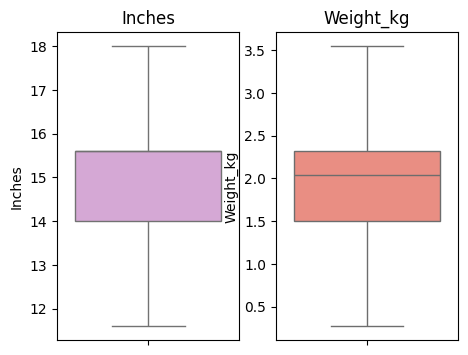

In [ ]:
# Checking that Handled Outliers

plt.figure(figsize=(8,4))

plt.subplot(1,3,1)
sns.boxplot(y=new_df["Inches"], color="plum")
plt.title("Inches")
plt.ylabel("Inches")

plt.subplot(1,3,2)
sns.boxplot(y=new_df["Weight_kg"], color="salmon")
plt.title("Weight_kg")
plt.ylabel("Weight_kg")

plt.show()

In [ ]:
new_df["ScreenResolution"].sample(10)

21             IPS Panel Full HD 1920x1080
956        Full HD / Touchscreen 1920x1080
139            IPS Panel Full HD 1920x1080
476                      Full HD 1920x1080
1019                     Full HD 1920x1080
454                      Full HD 1920x1080
498            IPS Panel Full HD 1920x1080
465                               1366x768
1234                              1366x768
0       IPS Panel Retina Display 2560x1600
Name: ScreenResolution, dtype: object

# Extracting and Categorizing ScreenResolution Column


In [ ]:
# Extracting IPS Panel information and creating new column for it
new_df['IPS_Panel'] = new_df['ScreenResolution'].str.contains('IPS', case=False, regex=False).map({True: 'Yes', False: 'No'})

# Extracting TouchScreen information and creating new column for it
new_df['Touchscreen'] = new_df['ScreenResolution'].str.contains('Touchscreen', case=False, regex=False).map({True: 'Yes', False: 'No'})

# Extracting Resolution information and creating new column
new_df['Resolution'] = new_df['ScreenResolution'].str.extract(r'(\d+x\d+)', expand=False)

# Extracting width and height from 'Resolution' column
new_df[['Width', 'Height']] = new_df['Resolution'].str.split('x', expand=True).astype(int)
# Calculating PPI using the width, height, and inches columns and rounding off to integer
new_df['PPI'] = ((new_df['Width']**2 + new_df['Height']**2)**0.5 / new_df['Inches']).round().astype(int)



In [ ]:
# identifying unique resolution present in data
new_df['Resolution'].unique()

array(['2560x1600', '1440x900', '1920x1080', '2880x1800', '1366x768',
       '2304x1440', '3200x1800', '2256x1504', '3840x2160', '2160x1440',
       '1600x900', '2560x1440', '2736x1824', '2400x1600', '1920x1200'],
      dtype=object)

In [ ]:
# Refering from above ScreenResolution insihgts conclusion
# Created a function to categorize resolutions into display types
def categorize_display_type(resolution):
    if resolution == '1366x768':
        return 'HD'
    elif resolution in ['1440x900', '1600x900']:
        return 'HD+'
    elif resolution in ['1920x1080', '1920x1200', '2160x1440']:
        return 'Full HD'
    elif resolution in ['2304x1440', '2560x1600', '2736x1824', '2880x1800']:
        return 'Retina Display'
    elif resolution in ['2560x1440', '3200x1800']:
        return 'Quad HD'
    elif resolution in ['3840x2160']:
        return '4K Ultra HD'
    else:
        return 'Not Specified'

# Applying the function to create a new column of Display type
new_df['Display_Type'] = new_df['Resolution'].apply(categorize_display_type)

In [ ]:
# Droppping ScreenResolution column as we extraction and categorization part of it is done and we dont need it for the further modeling
# creating new df named as model_df for new column
new_df.drop(columns=['ScreenResolution', 'Width', 'Height'], inplace=True)

In [ ]:
# checking the new column and accurately categorized and extracted
new_df.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Price,Weight_kg,IPS_Panel,Touchscreen,Resolution,PPI,Display_Type
919,MSI,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,59668.8048,2.20,No,No,1920x1080,141,Full HD
927,HP,Notebook,15.6,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,62071.2000,2.31,No,No,1920x1080,141,Full HD
122,Lenovo,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Nvidia GeForce 940MX,No OS,33513.1200,2.20,No,No,1920x1080,141,Full HD
768,Samsung,Ultrabook,13.3,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,85194.7200,1.31,No,Yes,1920x1080,166,Full HD
311,Dell,Ultrabook,13.3,Intel Core i7 8550U 1.8GHz,16GB,1TB SSD,Intel UHD Graphics 620,Windows 10,133146.7200,1.21,Yes,Yes,3840x2160,331,4K Ultra HD


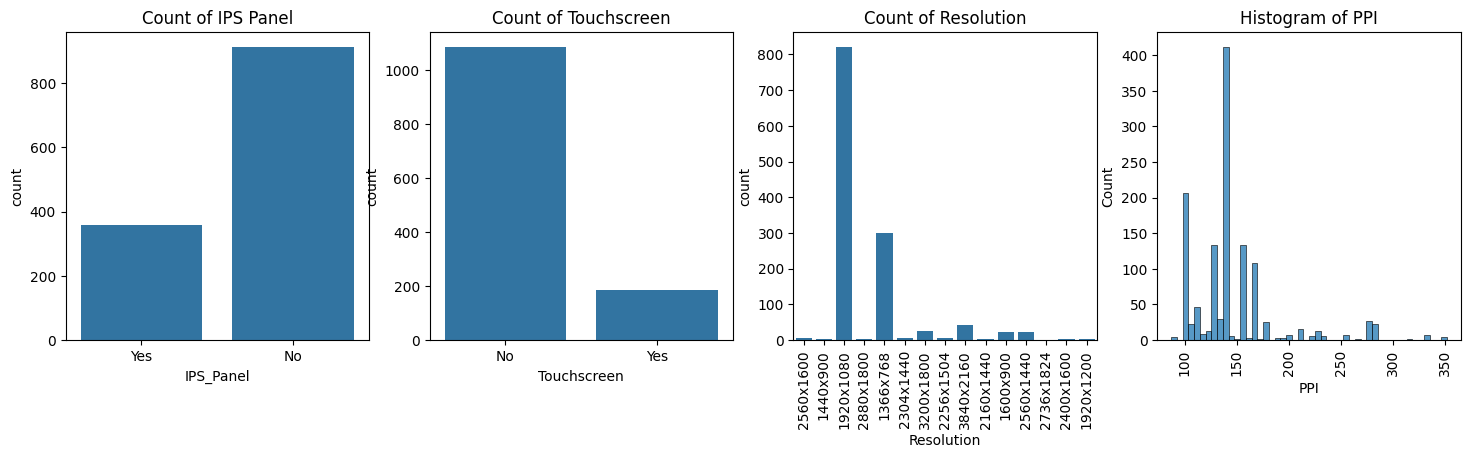

In [ ]:
plt.figure(figsize=(18,4))
# Count plot of IPS_Panel
plt.subplot(1,4,1)
sns.countplot(data=new_df, x='IPS_Panel')
plt.title("Count of IPS Panel")
# Count plot of Touchscreen
plt.subplot(1,4,2)
sns.countplot(data=new_df, x='Touchscreen')
plt.title("Count of Touchscreen")
# Count plot of Resolution
plt.subplot(1,4,3)
sns.countplot(data=new_df, x='Resolution')
plt.title("Count of Resolution")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
# Count plot of PPI
plt.subplot(1,4,4)
sns.histplot(data=new_df, x='PPI')
plt.title("Histogram of PPI")
plt.xticks(rotation=90)  # Rotate x-axis labels vertically
plt.show()

# Extracting and Categorizing CPU Column

In [ ]:
#  Extracting & Creating new columns brand, family, type, speed from CPU column from its information
new_df['CPU_Brand'] = new_df['Cpu'].str.extract(r'(?i)(Intel|AMD|Samsung)', expand=False)


In [ ]:
# Regular expression pattern to match CPU series
pattern = r'(?:Core\s(?:i\d|M)|E-Series|A4-Series|A6-Series|A8-Series|A9-Series|A10-Series|A12-Series|Ryzen|Atom|Xeon|Celeron\s(?:Dual\sCore|Quad\sCore)|Pentium\s(?:Dual\sCore|Quad\sCore)|Cortex\sA(?:\d+&\w+))'

# Function to extract CPU series
def extract_cpu_series(cpu_description):
    match = re.search(pattern, cpu_description)
    return match.group(0) if match else None

# Extract CPU series and create a new column
new_df['CPU_Series'] = new_df['Cpu'].apply(extract_cpu_series)

In [ ]:
# new column CPU Speed ghz by extrating speed from cpu column
new_df['CPU_Speed_GHz'] = new_df['Cpu'].str.extract(r'(\d+\.*\d*GHz)', expand=False)
# Converting it to numerical column by removing GHz from data and naming column as CPU_Speed_GHz
new_df['CPU_Speed_GHz'] = new_df['CPU_Speed_GHz'].str.replace('GHz', '').astype(float)

In [ ]:
# Dropping Cpu column
new_df.drop(columns=['Cpu'], inplace=True)

In [ ]:
# identifying this column type present in data and finding count of it
# CPU_Brand
unique_CPU_Brand = new_df["CPU_Brand"].unique()
print(unique_CPU_Brand)
total_CPU_Brand = len(unique_CPU_Brand)
print(f"Total type in CPU_Brand : {total_CPU_Brand}")
print('====================================================')
# CPU_Speed_GHz
unique_CPU_Speed_GHz = new_df["CPU_Speed_GHz"].unique()
print(unique_CPU_Speed_GHz)
total_CPU_Speed_GHz = len(unique_CPU_Speed_GHz)
print(f"Total type in CPU_Speed_GHz : {total_CPU_Speed_GHz}")
print('====================================================')
# CPU_Series
unique_CPU_Series = new_df["CPU_Series"].unique()
print(unique_CPU_Series)
total_CPU_Series = len(unique_CPU_Series)
print(f"Total type in CPU_Series : {total_CPU_Series}")

['Intel' 'AMD' 'Samsung']
Total type in CPU_Brand : 3
[2.3  1.8  2.5  2.7  3.1  3.   2.2  1.6  2.   2.8  1.2  2.9  2.4  1.5
 1.9  1.44 1.1  1.3  2.6  3.6  3.2  1.   2.1  0.9  1.92]
Total type in CPU_Speed_GHz : 25
['Core i5' 'Core i7' 'A9-Series' 'Core i3' 'Core M' 'E-Series' 'Atom'
 'A6-Series' 'Celeron Dual Core' 'Ryzen' 'Pentium Quad Core' None 'Xeon'
 'A10-Series' 'A8-Series' 'A12-Series' 'Celeron Quad Core'
 'Pentium Dual Core' 'A4-Series' 'Cortex A72&A53']
Total type in CPU_Series : 20


# Preprocessing RAM Column:
* for details we can refer the above RAM insights done above

In [ ]:
# Removing 'GB' from RAM column and converting it to numerical column and renaming it as RAM_GB
new_df['RAM_GB'] = new_df['Ram'].str.replace('GB', '').astype(int)

In [ ]:
# Dropping Ram column
new_df.drop(columns=['Ram'], inplace=True)

# PreProcessing Memory Column :

In [ ]:
# Seperated memory column into memory 1 and memory 2 column bt using regex,seperating them from '+'
new_df[['Memory_1', 'Memory_2']] = new_df['Memory'].str.split('+', expand=True)

In [ ]:
# Extracting and categorizing memory column into memory_size and memory_type column
def extract_memory_info(memory):
    if memory and memory != '?':
        size = re.findall(r'(\d+(?:\.\d+)?(?:GB|TB))', memory)
        type_ = re.findall(r'(SSD|HDD|Flash Storage|Hybrid)', memory)
        return size[0] if size else None, type_[0] if type_ else None
    else:
        return None, None

# Extracting memory size and type for Memory_1 and Memory_2
new_df['Memory_1_Size'], new_df['Memory_1_Type'] = zip(*new_df['Memory_1'].apply(extract_memory_info))
new_df['Memory_2_Size'], new_df['Memory_2_Type'] = zip(*new_df['Memory_2'].apply(extract_memory_info))

In [ ]:
# Conversion of Memory size column Categorial to Numerical
# Defining a function to convert sizes to a uniform scale (GB) and then to integer
def convert_to_gb_and_int(size):
    if size:
        size = size.strip().upper()
        if 'TB' in size:
            return int(float(size.replace('TB', '')) * 1024)  # Convert TB to GB and then to integer
        elif 'GB' in size:
            return int(size.replace('GB', ''))
        else:
            return None
    else:
        return None
# Applying the conversion function to the 'Memory_1_Size' and Memory_2_Size column and converting to integer
new_df['Memory_1_Size'] = new_df['Memory_1_Size'].apply(convert_to_gb_and_int).astype('Int64')
new_df['Memory_2_Size'] = new_df['Memory_2_Size'].apply(convert_to_gb_and_int).astype('Int64')

# Renaming the size column to Memory_size_GB
new_df.rename(columns={'Memory_1_Size': 'Memory_1_Size_GB'}, inplace=True)
new_df.rename(columns={'Memory_2_Size': 'Memory_2_Size_GB'}, inplace=True)

In [ ]:
# Dropping Memory, Memory_1, Memory_2 column
new_df.drop(columns=['Memory','Memory_1','Memory_2'], inplace=True)

In [ ]:
# checking the data, preprocessing on memory column is correclty done or not
new_df.sample(4)

,Company,TypeName,Inches,Gpu,OpSys,Price,Weight_kg,IPS_Panel,Touchscreen,Resolution,PPI,Display_Type,CPU_Brand,CPU_Series,CPU_Speed_GHz,RAM_GB,Memory_1_Size_GB,Memory_1_Type,Memory_2_Size_GB,Memory_2_Type
635,Asus,Notebook,15.6,Nvidia GeForce GTX 1050,Windows 10,48304.7136,1.99,No,No,1920x1080,141,Full HD,Intel,Core i5,2.50,8,1024,HDD,<NA>,None
119,Asus,Notebook,15.6,Nvidia GeForce 940MX,Windows 10,59567.0400,1.70,No,No,1920x1080,141,Full HD,Intel,Core i7,1.80,8,256,SSD,<NA>,None
1100,Dell,Ultrabook,12.5,Intel HD Graphics 520,Windows 7,60480.7920,1.50,No,No,1366x768,125,HD,Intel,Core i3,2.30,4,500,HDD,<NA>,None
626,Mediacom,Notebook,14.0,Intel HD Graphics,Windows 10,12733.9200,1.40,No,No,1920x1080,157,Full HD,Intel,Atom,1.44,2,32,Flash Storage,<NA>,None


#Extracting and Categorizing GPU Column

In [ ]:
# Defining a function to extract GPU Brand and Model
def extract_gpu_info(gpu):
    gpu_brand = ''
    gpu_model = ''
    for word in gpu.split():
        if word.lower() in ['amd', 'nvidia', 'intel', 'arm']:
            gpu_brand += word + ' '
        else:
            gpu_model += word + ' '
    return gpu_brand.strip(), gpu_model.strip()

# Applying the function to the GPU column
new_df[['GPU_Brand', 'GPU_Model_info']] = new_df['Gpu'].apply(extract_gpu_info).apply(pd.Series)


In [ ]:
# Function to extract model name
def extract_model_name(gpu):
    # Split the GPU entry into words
    words = gpu.split()
    # Extract the model name (second word)
    model_name = words[0]
    return model_name

# Apply the function to the GPU column and create a new column for the model name
new_df['GPU_Model'] = new_df['GPU_Model_info'].map(extract_model_name)

In [ ]:
unique = new_df["GPU_Model"].unique()
print(unique)

['Iris' 'HD' 'Radeon' 'GeForce' 'UHD' 'R4' 'GTX' 'R17M-M1-70' 'Quadro'
 'FirePro' 'Graphics' 'Mali']


In [ ]:
# Filter out non-model names
valid_models = ['Iris', 'HD', 'Radeon', 'GeForce', 'UHD', 'Quadro', 'FirePro', 'Mali']
new_df['GPU_Model'] = new_df['GPU_Model'].apply(lambda x: x if x in valid_models else "Not Specified")

In [ ]:
# Function to extract words except specified model names
def extract_words_except_models(gpu):
    # Split the GPU entry into words
    words = gpu.split()
    # Filter out model names
    valid_models = ['Iris', 'HD', 'Radeon', 'GeForce', 'UHD', 'Quadro', 'FirePro', 'Mali']
    words_except_models = [word for word in words if word not in valid_models]
    # Join the remaining words
    return ' '.join(words_except_models)

# Apply the function to the GPU column and create a new column for the extracted words
new_df['GPU_Model_series'] = new_df['GPU_Model_info'].map(extract_words_except_models)

In [ ]:
# Dropping Gpu and GPU model column after succesfully extracting and categorzing it
new_df.drop(columns=['Gpu', 'GPU_Model_info'], inplace=True)

In [ ]:
# Checking for Preprocessing done correct or not
new_df.sample(5)

,Company,TypeName,Inches,OpSys,Price,Weight_kg,IPS_Panel,Touchscreen,Resolution,PPI,...,CPU_Series,CPU_Speed_GHz,RAM_GB,Memory_1_Size_GB,Memory_1_Type,Memory_2_Size_GB,Memory_2_Type,GPU_Brand,GPU_Model,GPU_Model_series
1135,Lenovo,Notebook,15.6,Windows 10,58554.720,2.50,No,No,1920x1080,141,...,Core i7,2.5,16,1024,Hybrid,<NA>,None,AMD,Radeon,R7 M360
857,HP,2 in 1 Convertible,13.3,Windows 10,136343.520,1.28,No,Yes,1920x1080,166,...,Core i7,2.8,8,256,SSD,<NA>,None,Intel,HD,Graphics 620
1136,HP,Workstation,17.3,Windows 7,210424.032,3.00,Yes,No,1920x1080,127,...,Core i7,2.6,8,256,SSD,<NA>,None,Nvidia,Quadro,M3000M
212,HP,Notebook,15.6,No OS,18594.720,2.10,No,No,1920x1080,141,...,Core i3,2.0,4,500,HDD,<NA>,None,Intel,HD,Graphics 520
1157,Lenovo,Ultrabook,14.0,Windows 7,122490.720,1.40,No,No,1920x1080,157,...,Core i7,2.6,12,512,SSD,<NA>,None,Intel,HD,Graphics 520


# Preprocessing OpSys Column:
* Refering from OpSys inights conclusion above
* We observe that the opsys column need to be clean as and give standarized name to the opsys brand name
* So after carefull observation i found that Mac OS is not according to standard name present in current market


In [ ]:
# Cleanin up the 'OpSys' column
new_df['OpSys'] = new_df['OpSys'].str.replace('Mac OS', 'macOS')  # Merge 'Mac OS' into 'macOS'


In [ ]:
# Function to categorize operating systems into brands and versions
def categorize_opsys(op_sys):
    brands = ['Windows', 'Linux', 'Chrome OS', 'macOS', 'No OS', 'Android']
    for brand in brands:
        if brand in op_sys:
            version = op_sys.replace(brand, '').strip()
            if version == '':
                version = None  # Replace empty string with None
            return brand, version
    return 'Other', op_sys

# Applying the categorization function and create new columns
new_df[['OS_Brand', 'OS_Version']] = new_df['OpSys'].apply(lambda x: pd.Series(categorize_opsys(x)))

In [ ]:
# checking unique values in brand and version column
unique = new_df["OS_Brand"].unique()
print(unique)
unique = new_df["OS_Version"].unique()
print(unique)

['macOS' 'No OS' 'Windows' 'Linux' 'Chrome OS' 'Android']
[None '10' 'X' '10 S' '7']


In [ ]:
# Dropping OpSys Column after Preprocessing it
new_df.drop(columns=['OpSys'], inplace=True)

In [ ]:
# Checking for Preprocessing done correct or not
new_df.sample(5)

,Company,TypeName,Inches,Price,Weight_kg,IPS_Panel,Touchscreen,Resolution,PPI,Display_Type,...,RAM_GB,Memory_1_Size_GB,Memory_1_Type,Memory_2_Size_GB,Memory_2_Type,GPU_Brand,GPU_Model,GPU_Model_series,OS_Brand,OS_Version
1164,HP,Notebook,15.6,25414.0272,2.10,No,No,1366x768,100,HD,...,4,500,HDD,<NA>,None,Intel,HD,Graphics 520,No OS,None
1092,Asus,Gaming,17.3,85194.7200,2.70,Yes,No,1920x1080,127,Full HD,...,8,256,SSD,1024,HDD,Nvidia,GeForce,GTX 1060,Windows,10
902,Dell,2 in 1 Convertible,13.3,87858.7200,1.22,No,Yes,1920x1080,166,Full HD,...,16,256,SSD,<NA>,None,Intel,HD,Graphics 615,Windows,10
632,Lenovo,Notebook,15.6,44169.1200,1.80,No,No,1920x1080,141,Full HD,...,4,256,SSD,<NA>,None,Intel,UHD,Graphics 620,Windows,10
166,Acer,Notebook,15.6,19367.8128,2.10,No,No,1366x768,100,HD,...,4,1024,HDD,<NA>,None,Intel,HD,Graphics 505,Windows,10


# Completed All column Preprocerssing part of extracting adn categorizinf them for relevant feature

In [ ]:
# checking info about new_df
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   Price             1273 non-null   float64
 4   Weight_kg         1273 non-null   float64
 5   IPS_Panel         1273 non-null   object 
 6   Touchscreen       1273 non-null   object 
 7   Resolution        1273 non-null   object 
 8   PPI               1273 non-null   int64  
 9   Display_Type      1273 non-null   object 
 10  CPU_Brand         1273 non-null   object 
 11  CPU_Series        1271 non-null   object 
 12  CPU_Speed_GHz     1273 non-null   float64
 13  RAM_GB            1273 non-null   int64  
 14  Memory_1_Size_GB  1272 non-null   Int64  
 15  Memory_1_Type     1272 non-null   object 
 16  Memory_2_Size_GB  204 non-null    Int64  
 17  

In [ ]:
# checking null values in new_df
new_df.isnull().sum()

Company                0
TypeName               0
Inches                 0
Price                  0
Weight_kg              0
IPS_Panel              0
Touchscreen            0
Resolution             0
PPI                    0
Display_Type           0
CPU_Brand              0
CPU_Series             2
CPU_Speed_GHz          0
RAM_GB                 0
Memory_1_Size_GB       1
Memory_1_Type          1
Memory_2_Size_GB    1069
Memory_2_Type       1069
GPU_Brand              0
GPU_Model              0
GPU_Model_series       0
OS_Brand               0
OS_Version           165
dtype: int64

## As we can see there all missing values in some column, so for that we will perform furhter step to to handle missing values
Missing values in **Numerical column** :
* **Independent:** Inches, Weight, Memory_1_Size_GB, Memory_2_Size_GB            
* **Dependent:** PPI

Missing values in **Categorial Column** :
* **Independent:** Memory_1_Type, Memory_2_Type
* **Dependent:** CPU_series, OS_Version

Filling Missing values accordingly
* Filling missing values in column Memory_1_Size_GB,Memory_1_Type  with **Mode**    
* Filling missing values in column CPU_series, OS_Version as not specified
* Filling missing values in column Memory_2_Size_GB as 0 and for Memory_2_Type as 'Not Specified'

In [ ]:
# Filling missing values in column Inches, Weight, Memory_1_Size_GB,Memory_1_Type with Mode
new_df[['Memory_1_Size_GB', 'Memory_1_Type']] = new_df[['Memory_1_Size_GB', 'Memory_1_Type']].fillna(new_df.mode().iloc[0])

In [ ]:
# Filling missing values in column CPU_Series, OpSys_Version as not specified
new_df[['CPU_Series','OS_Version']] = new_df[['CPU_Series','OS_Version']].fillna('Not Specified')

In [ ]:
# Filling missing values in column Memory_2_Size_GB as 0
new_df['Memory_2_Size_GB'] = new_df['Memory_2_Size_GB'].fillna(0)
# Filling missing values in column , Memory_2_Type as not specified
new_df['Memory_2_Type'] = new_df['Memory_2_Type'].fillna('Not Specified')

In [ ]:
#Checking Null values
new_df.isnull().sum()

Company             0
TypeName            0
Inches              0
Price               0
Weight_kg           0
IPS_Panel           0
Touchscreen         0
Resolution          0
PPI                 0
Display_Type        0
CPU_Brand           0
CPU_Series          0
CPU_Speed_GHz       0
RAM_GB              0
Memory_1_Size_GB    0
Memory_1_Type       0
Memory_2_Size_GB    0
Memory_2_Type       0
GPU_Brand           0
GPU_Model           0
GPU_Model_series    0
OS_Brand            0
OS_Version          0
dtype: int64

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   Price             1273 non-null   float64
 4   Weight_kg         1273 non-null   float64
 5   IPS_Panel         1273 non-null   object 
 6   Touchscreen       1273 non-null   object 
 7   Resolution        1273 non-null   object 
 8   PPI               1273 non-null   int64  
 9   Display_Type      1273 non-null   object 
 10  CPU_Brand         1273 non-null   object 
 11  CPU_Series        1273 non-null   object 
 12  CPU_Speed_GHz     1273 non-null   float64
 13  RAM_GB            1273 non-null   int64  
 14  Memory_1_Size_GB  1273 non-null   Int64  
 15  Memory_1_Type     1273 non-null   object 
 16  Memory_2_Size_GB  1273 non-null   Int64  
 17  

In [ ]:
# Save the DataFrame to an Excel file
new_df.to_excel('new_laptop.xlsx', index=False)